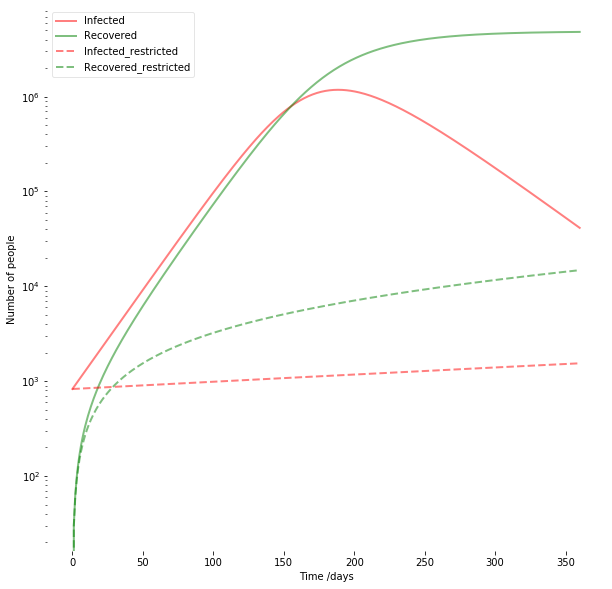

In [26]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 5600000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 827, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 2.35/28, 1./28
# if restricted travel
beta_r, gamma_r = 1.05/28, 1./28 
# A grid of time points (in days)
t = np.linspace(0, 360, 360)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# model for restricted Travel
ret_r = odeint(deriv, y0, t, args=(N, beta_r, gamma_r))
S_r, I_r, R_r = ret_r.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w', figsize=(10, 10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered')
ax.plot(t, I_r, 'r--', alpha=0.5, lw=2, label='Infected_restricted')
ax.plot(t, R_r, 'g--', alpha=0.5, lw=2, label='Recovered_restricted')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number of people')
ax.set_yscale('log')
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()